In [25]:
import nilearn.datasets
import pandas as pd
import matplotlib
from nilearn.input_data import NiftiLabelsMasker

In [26]:
patient_df = pd.read_csv("./patient_ids.csv")

In [27]:
ids = list(patient_df['ID'])

In [28]:
data = nilearn.datasets.fetch_oasis_vbm(data_dir="./data/")

/home/wiladdis/.local/lib/python3.8/site-packages/numpy/lib/npyio.py:2407: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [29]:
data.gray_matter_maps[28]

'./data/oasis1/OAS1_0032_MR1/mwrc1OAS1_0032_MR1_mpr_anon_fslswapdim_bet.nii.gz'

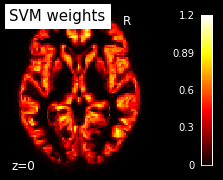

In [30]:
# Create the figure
from nilearn.plotting import plot_stat_map, show
bg_filename = data.gray_matter_maps[0]
z_slice = 0
display = plot_stat_map(data.gray_matter_maps[0], bg_img=bg_filename,
                        display_mode='z', cut_coords=[z_slice])
display.title("SVM weights")
show()

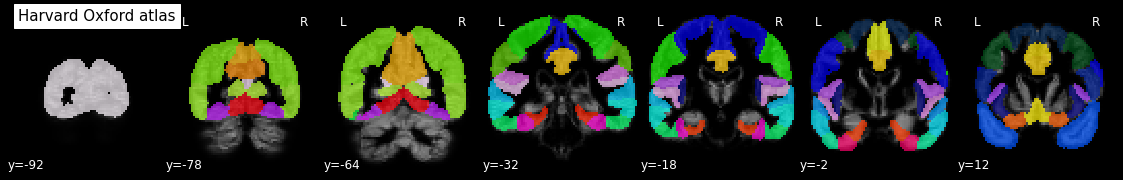

In [31]:
harvardData = nilearn.datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm" ,data_dir = './data/', resume = True)
nilearn.plotting.plot_roi(harvardData.maps, title="Harvard Oxford atlas", display_mode = 'y', bg_img = data.gray_matter_maps[0])

In [35]:
from nilearn import datasets
masker = NiftiLabelsMasker(labels_img = harvardData, standardize=True)
data = datasets.fetch_development_fmri(n_subjects=1)
fmri_filenames = data[0]
time_series = masker.fit_transform(fmri_filenames)

KeyError: 0